# Simple absorption & elimination model

In the following we study a simple model for absorption and elimination. A can be absorbed from the tablet in the systemic circulation ($A_{tablet} \rightarrow A_{system}$) which can be eliminated in the urine via renal excretion ($A_{system} \rightarrow A_{urine}$).

![Absorption Elimination Model](04_simple_absorption_elimination.png)

Elimination and absorption are assumed to be Mass-Action, i.e., depending on a rate constant k and the amount or concentration of the respective substance.

The ordinary differential equation system (ODE) results in: 

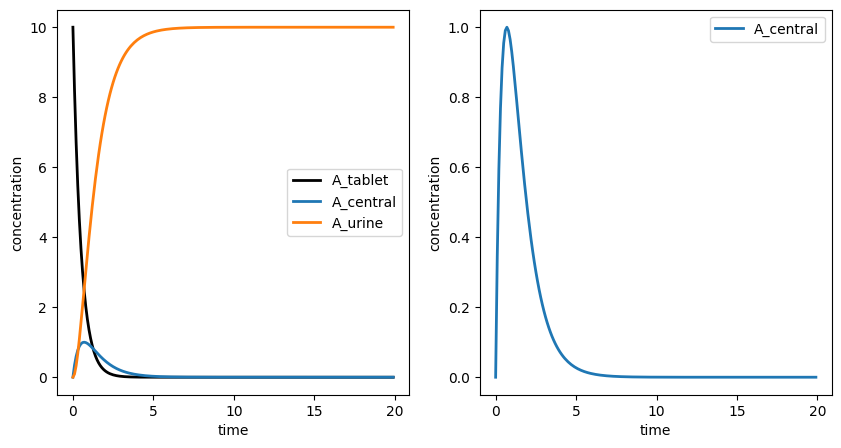

In [12]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pylab as plt

def dxdt_absorption_elimination(x, t, ka, ke, V):
    """
    System of ODEs of the compartment model.
    """
    # state variables
    A_tablet = x[0]  # [mg]
    A_central = x[1] # [mg/l]
    A_urine = x[2] # [mg]
    
    # rates
    va = ka * A_tablet  # [mg/hr]
    ve = ke * A_central # [mg/hr]

    # odes (stoichiometric equation)    
    return [
        -va,            # dA_tablet/dt  [mg/hr]
         (va - ve)/V,   # dA_central/dt [mg/l/hr]
         ve,            # dA_urine/dt  [mg/hr]
    ] 


# initial condition and time span
t = np.arange(0, 20, 0.1) # [hr]
Dose_A = 10.0  # [mg]
V = 5  # [l]
x0 = [
    Dose_A,  # A_tablet  [mg]
    0.0,   # A_central [mg/l]
    0.0,   # A_urine [mg]
]

# parameters
ka = 2.0  # [1/hr]
ke = 5.0  # [1/hr]

x = odeint(dydt_absorption_elimination, x0, t, args=(ka, ke, V))
names = ["A_tablet", "A_central", "A_urine"]
colors = ["black", "tab:blue", "tab:orange"]


def plot_model_results(x: np.ndarray, title: str):
    """Function to plot given model results."""

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    # all species
    for k, name in enumerate(names):
        ax1.plot(t, x[:, k], linewidth=2, label=name, color=colors[k])

    # only A_central
    ax2.plot(t, x[:, 1], linewidth=2, label=names[1], color=colors[1])

    for ax in (ax1, ax2):

        ax.legend()
        ax.set_xlabel("time")
        ax.set_ylabel("concentration")

    plt.show()
    
plot_model_results(x=x, title="Reference solution")

When `va = ve` the peak concentration in the central compartment is reached.

# More complex absorption models

In [ ]:
def dxdt_absorption_elimination(x, t, ka, ke, V):
    """
    System of ODEs of the compartment model.
    """
    # state variables
    A_tablet = x[0]  # [mg]
    A_central = x[1] # [mg/l]
    A_urine = x[2] # [mg]
    
    # rates
    va = ka * A_tablet  # [mg/hr]
    ve = ke * A_central # [mg/hr]

    # odes (stoichiometric equation)    
    return [
        -va,            # dA_tablet/dt  [mg/hr]
         (va - ve)/V,   # dA_central/dt [mg/l/hr]
         ve,            # dA_urine/dt  [mg/hr]
    ] 


# initial condition and time span
t = np.arange(0, 20, 0.1) # [hr]
Dose_A = 10.0  # [mg]
V = 5  # [l]
x0 = [
    Dose_A,  # A_tablet  [mg]
    0.0,   # A_central [mg/l]
    0.0,   # A_urine [mg]
]

# parameters
ka = 2.0  # [1/hr]
ke = 5.0  # [1/hr]

x = odeint(dydt_absorption_elimination, x0, t, args=(ka, ke, V))
names = ["A_tablet", "A_central", "A_urine"]
colors = ["black", "tab:blue", "tab:orange"]